##### Import libraries 


In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

##### Import Amazon reviews dataset

In [2]:
amzn_df = pd.read_csv('amazon_reviews.csv')


##### Exploratory Data Analysis

In [82]:
#take a look at the data 
amzn_df.tail(10)

,rating,date,variation,verified_reviews,feedback,month
3140,4,30-Jul-18,White Dot,Barry,1,7
3141,3,30-Jul-18,Black Dot,,1,7
3142,4,30-Jul-18,White Dot,My three year old loves it. Good for doing ba...,1,7
3143,5,30-Jul-18,Black Dot,Awesome device wish I bought one ages ago.,1,7
3144,5,30-Jul-18,Black Dot,love it,1,7
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,7
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,7
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,7
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,7
3149,4,29-Jul-18,Black Dot,Good,1,7


In [4]:
amzn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [7]:
#no missing values
amzn_df.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

array([[<AxesSubplot:title={'center':'rating'}>]], dtype=object)

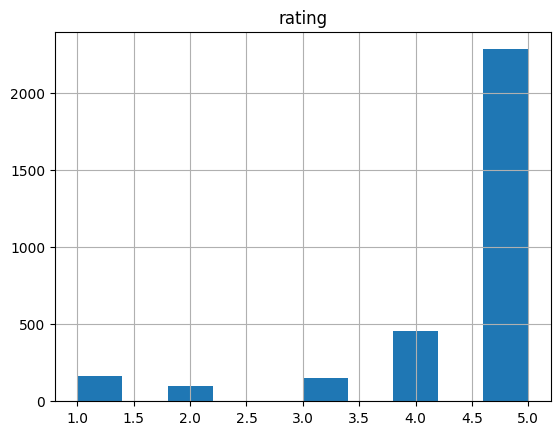

In [9]:
amzn_df.hist(column='rating',bins=10)
#a lot of 5 star ratings 

array([[<AxesSubplot:title={'center':'feedback'}>]], dtype=object)

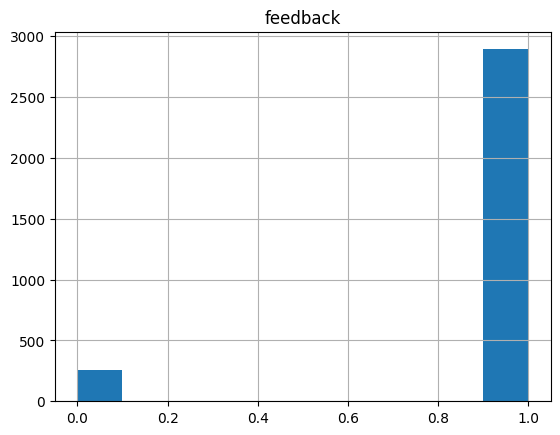

In [11]:
#a lot more positive feedback than negative 
amzn_df.hist(column ='feedback')

<AxesSubplot:title={'center':'rating'}, xlabel='feedback'>

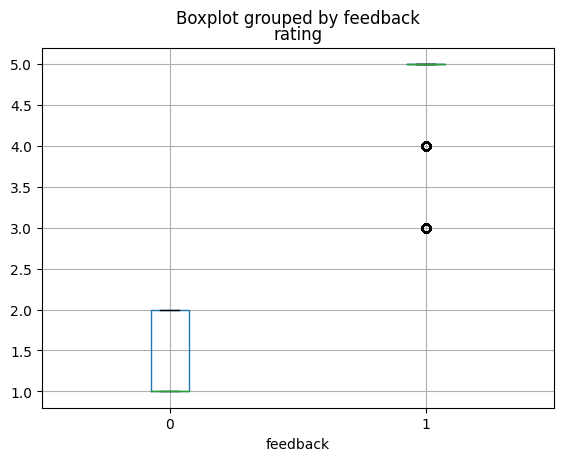

In [13]:
#search for correlations 
#makes sense since negative feedback means lower ratings
amzn_df.boxplot(column='rating', by = 'feedback')


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(1, 0, 'Black'),
  Text(2, 0, 'Black  Dot'),
  Text(3, 0, 'Black  Plus'),
  Text(4, 0, 'Black  Show'),
  Text(5, 0, 'Black  Spot'),
  Text(6, 0, 'Charcoal Fabric '),
  Text(7, 0, 'Configuration: Fire TV Stick'),
  Text(8, 0, 'Heather Gray Fabric '),
  Text(9, 0, 'Oak Finish '),
  Text(10, 0, 'Sandstone Fabric '),
  Text(11, 0, 'Walnut Finish '),
  Text(12, 0, 'White'),
  Text(13, 0, 'White  Dot'),
  Text(14, 0, 'White  Plus'),
  Text(15, 0, 'White  Show'),
  Text(16, 0, 'White  Spot')])

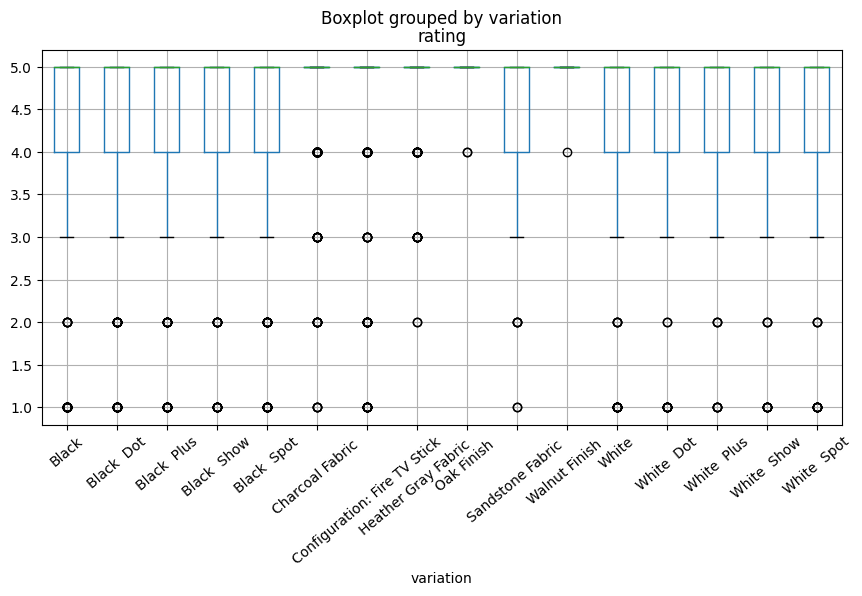

In [21]:
amzn_df.boxplot(column='rating',by = 'variation',figsize=(10,5))
plt.xticks(rotation = 40)

In [33]:
grouped_var = amzn_df.groupby('variation')
grouped_var.describe()

rating                                          \
                              count      mean       std  min  25%  50%  75%   
variation                                                                     
Black                         261.0  4.233716  1.339838  1.0  4.0  5.0  5.0   
Black  Dot                    516.0  4.453488  1.027660  1.0  4.0  5.0  5.0   
Black  Plus                   270.0  4.370370  1.158391  1.0  4.0  5.0  5.0   
Black  Show                   265.0  4.490566  0.996635  1.0  4.0  5.0  5.0   
Black  Spot                   241.0  4.311203  1.247764  1.0  4.0  5.0  5.0   
Charcoal Fabric               430.0  4.730233  0.683994  1.0  5.0  5.0  5.0   
Configuration: Fire TV Stick  350.0  4.591429  0.990751  1.0  5.0  5.0  5.0   
Heather Gray Fabric           157.0  4.694268  0.647108  2.0  5.0  5.0  5.0   
Oak Finish                     14.0  4.857143  0.363137  4.0  5.0  5.0  5.0   
Sandstone Fabric               90.0  4.355556  0.997875  1.0  4.0  5.0  5.0   
Walnut Finish                   9.0  4.888889  0.333333  4.0  5.0  5.0  5.0   
White                          91.0  4.142857  1.464934  1.0  4.0  5.0  5.0   
White  Dot                    184.0  4.423913  1.047857  1.0  4.0  5.0  5.0   
White  Plus                    78.0  4.358974  1.184032  1.0  4.0  5.0  5.0   
White  Show                    85.0  4.282353  1.278129  1.0  4.0  5.0  5.0   
White  Spot                   109.0  4.311927  1.222454  1.0  4.0  5.0  5.0   

                                  feedback                                     \
                              max    count      mean       std  min  25%  50%   
variation                                                                       
Black                         5.0    261.0  0.865900  0.341414  0.0  1.0  1.0   
Black  Dot                    5.0    516.0  0.930233  0.255002  0.0  1.0  1.0   
Black  Plus                   5.0    270.0  0.896296  0.305442  0.0  1.0  1.0   
Black  Show                   5.0    265.0  0.932075  0.252092  0.0  1.0  1.0   
Black  Spot                   5.0    241.0  0.867220  0.340043  0.0  1.0  1.0   
Charcoal Fabric               5.0    430.0  0.972093  0.164898  0.0  1.0  1.0   
Configuration: Fire TV Stick  5.0    350.0  0.920000  0.271682  0.0  1.0  1.0   
Heather Gray Fabric           5.0    157.0  0.987261  0.112504  0.0  1.0  1.0   
Oak Finish                    5.0     14.0  1.000000  0.000000  1.0  1.0  1.0   
Sandstone Fabric              5.0     90.0  0.933333  0.250841  0.0  1.0  1.0   
Walnut Finish                 5.0      9.0  1.000000  0.000000  1.0  1.0  1.0   
White                         5.0     91.0  0.813187  0.391921  0.0  1.0  1.0   
White  Dot                    5.0    184.0  0.934783  0.247583  0.0  1.0  1.0   
White  Plus                   5.0     78.0  0.897436  0.305352  0.0  1.0  1.0   
White  Show                   5.0     85.0  0.870588  0.337647  0.0  1.0  1.0   
White  Spot                   5.0    109.0  0.889908  0.314450  0.0  1.0  1.0   

                                        
                              75%  max  
variation                               
Black                         1.0  1.0  
Black  Dot                    1.0  1.0  
Black  Plus                   1.0  1.0  
Black  Show                   1.0  1.0  
Black  Spot                   1.0  1.0  
Charcoal Fabric               1.0  1.0  
Configuration: Fire TV Stick  1.0  1.0  
Heather Gray Fabric           1.0  1.0  
Oak Finish                    1.0  1.0  
Sandstone Fabric              1.0  1.0  
Walnut Finish                 1.0  1.0  
White                         1.0  1.0  
White  Dot                    1.0  1.0  
White  Plus                   1.0  1.0  
White  Show                   1.0  1.0  
White  Spot                   1.0  1.0

In [34]:
#Which variation has the most positive/negative feedback?
positive = amzn_df[amzn_df['feedback']==1]
positive

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [35]:
negative = amzn_df[amzn_df['feedback']==0]
negative

,rating,date,variation,verified_reviews,feedback
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0
...,...,...,...,...,...
3047,1,30-Jul-18,Black Dot,Echo Dot responds to us when we aren't even ta...,0
3048,1,30-Jul-18,White Dot,NOT CONNECTED TO MY PHONE PLAYLIST :(,0
3067,2,30-Jul-18,Black Dot,The only negative we have on this product is t...,0
3091,1,30-Jul-18,Black Dot,I didn’t order it,0


In [42]:
grouped_pos = positive.groupby('variation')
grouped_pos2 = grouped_pos.count()
grouped_pos2.sort_values(by='feedback',ascending = False)['feedback']

variation
Black  Dot                      480
Charcoal Fabric                 418
Configuration: Fire TV Stick    322
Black  Show                     247
Black  Plus                     242
Black                           226
Black  Spot                     209
White  Dot                      172
Heather Gray Fabric             155
White  Spot                      97
Sandstone Fabric                 84
White                            74
White  Show                      74
White  Plus                      70
Oak Finish                       14
Walnut Finish                     9
Name: feedback, dtype: int64

In [43]:
grouped_neg = negative.groupby('variation')
grouped_neg2 = grouped_neg.count()
grouped_neg2.sort_values(by='feedback',ascending = False)['feedback']

variation
Black  Dot                      36
Black                           35
Black  Spot                     32
Black  Plus                     28
Configuration: Fire TV Stick    28
Black  Show                     18
White                           17
Charcoal Fabric                 12
White  Dot                      12
White  Spot                     12
White  Show                     11
White  Plus                      8
Sandstone Fabric                 6
Heather Gray Fabric              2
Name: feedback, dtype: int64

array([[<AxesSubplot:title={'center':'Black'}>,
        <AxesSubplot:title={'center':'Black  Dot'}>,
        <AxesSubplot:title={'center':'Black  Plus'}>,
        <AxesSubplot:title={'center':'Black  Show'}>],
       [<AxesSubplot:title={'center':'Black  Spot'}>,
        <AxesSubplot:title={'center':'Charcoal Fabric '}>,
        <AxesSubplot:title={'center':'Configuration: Fire TV Stick'}>,
        <AxesSubplot:title={'center':'Heather Gray Fabric '}>],
       [<AxesSubplot:title={'center':'Oak Finish '}>,
        <AxesSubplot:title={'center':'Sandstone Fabric '}>,
        <AxesSubplot:title={'center':'Walnut Finish '}>,
        <AxesSubplot:title={'center':'White'}>],
       [<AxesSubplot:title={'center':'White  Dot'}>,
        <AxesSubplot:title={'center':'White  Plus'}>,
        <AxesSubplot:title={'center':'White  Show'}>,
        <AxesSubplot:title={'center':'White  Spot'}>]], dtype=object)

<Figure size 1500x1500 with 0 Axes>

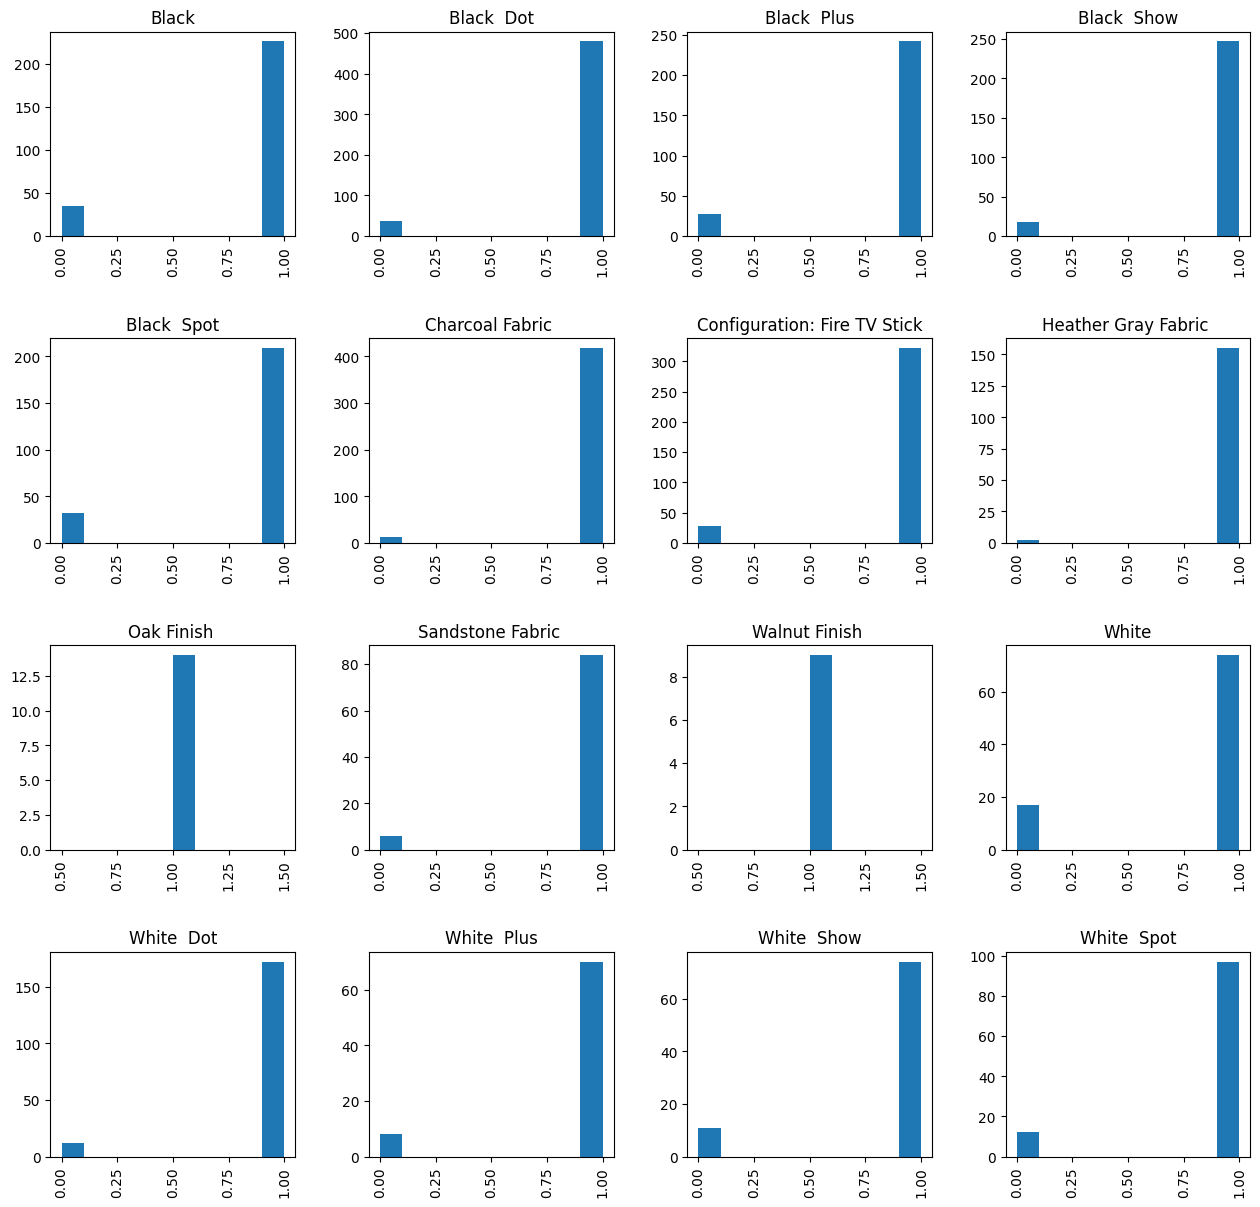

In [70]:
#take a look for each variation numbers of positive/negative feedbacks
plt.figure(figsize = (15,15))
amzn_df.hist(column='feedback',by = 'variation',figsize=(15,15))


[7 6 5]


array([[<AxesSubplot:title={'center':'5'}>,
        <AxesSubplot:title={'center':'6'}>],
       [<AxesSubplot:title={'center':'7'}>, <AxesSubplot:>]], dtype=object)

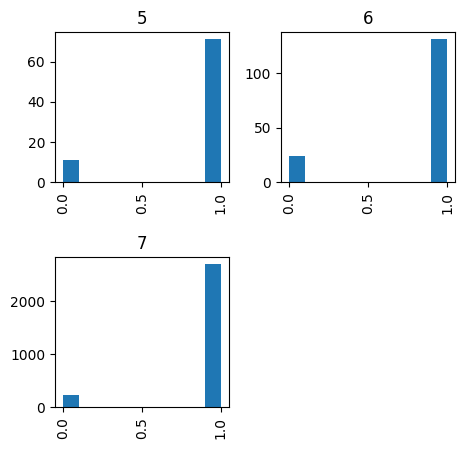

In [91]:
#what about months ?
#create a new column
amzn_df['month'] = pd.DatetimeIndex(amzn_df['date']).month
print(amzn_df['month'].unique())
amzn_df.hist(column='feedback',by = 'month',figsize=(5,5))
# a lot more feedback on july -> maybe it's because of the dataset

In [84]:
amzn_df['day'] = pd.DatetimeIndex(amzn_df['date']).day
amzn_df['day']

0       31
1       31
2       31
3       31
4       31
        ..
3145    30
3146    30
3147    30
3148    30
3149    29
Name: day, Length: 3150, dtype: int64

array([[<AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>,
        <AxesSubplot:title={'center':'4'}>,
        <AxesSubplot:title={'center':'5'}>,
        <AxesSubplot:title={'center':'6'}>],
       [<AxesSubplot:title={'center':'7'}>,
        <AxesSubplot:title={'center':'8'}>,
        <AxesSubplot:title={'center':'9'}>,
        <AxesSubplot:title={'center':'10'}>,
        <AxesSubplot:title={'center':'11'}>,
        <AxesSubplot:title={'center':'12'}>],
       [<AxesSubplot:title={'center':'13'}>,
        <AxesSubplot:title={'center':'14'}>,
        <AxesSubplot:title={'center':'15'}>,
        <AxesSubplot:title={'center':'16'}>,
        <AxesSubplot:title={'center':'17'}>,
        <AxesSubplot:title={'center':'18'}>],
       [<AxesSubplot:title={'center':'19'}>,
        <AxesSubplot:title={'center':'20'}>,
        <AxesSubplot:title={'center':'21'}>,
        <AxesSubplot:title={'center':'22'}>,
        <AxesSub

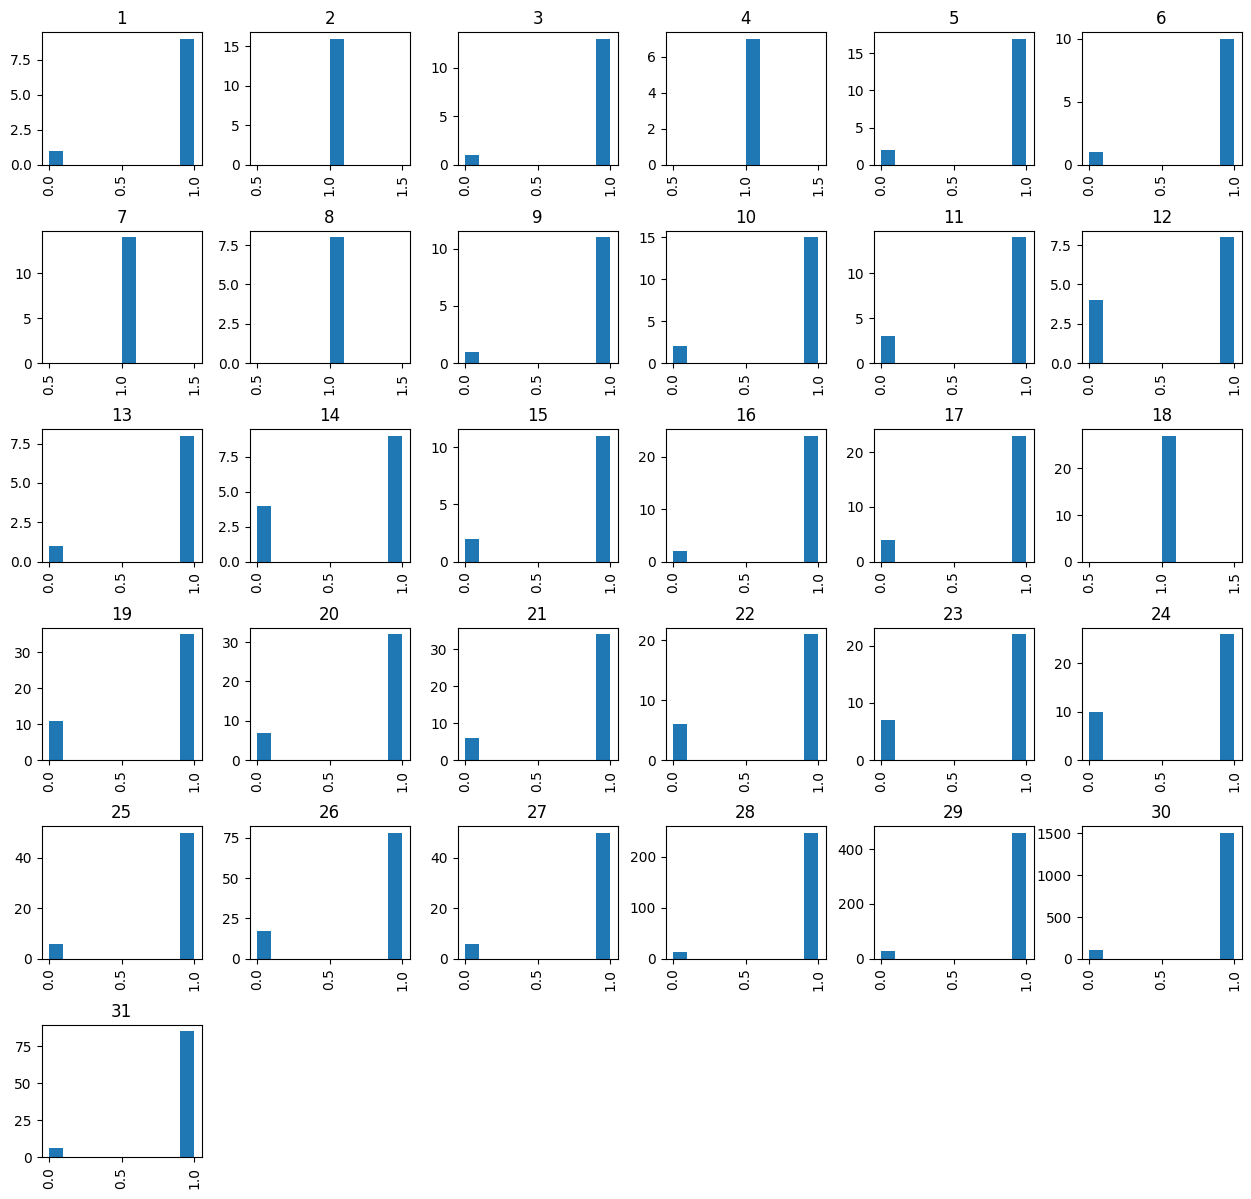

In [85]:
amzn_df.hist(column='feedback',by = 'day',figsize=(15,15))

##### Word analysis

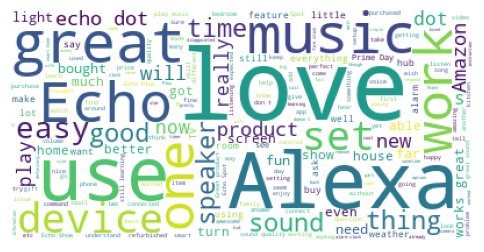

In [100]:
#Let's check which the positive and negative feedbacks and list top 3 popular words
#we have the positive and negative-->separated data
#firstly let's take a look at all the reviews
joined_sentences = ''.join(x for x in amzn_df['verified_reviews'])
#import the libraries for wordcloud
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
plt.figure(figsize=(6,6))
wordcloud = WordCloud(background_color='white').generate(joined_sentences)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
#we see a lot of times that the word love has been used which is good 
#It is used for music and work and in general there mostly used positive words such as good, great , easy 
#let's remove first though the punctuations and stopwords and take a look again

In [94]:
import string
string.punctuation
!pip install nltk
import nltk #natural language tool kit 
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english') #stopwords thath I have in the english language

You are using pip version 19.0.3, however version 22.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\FSU_EYDAP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

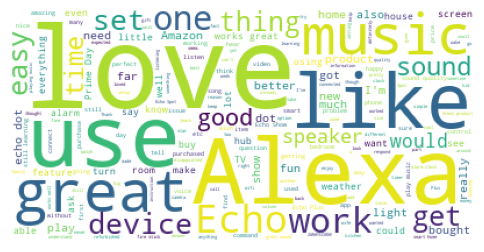

In [102]:
#wordcloud now 

plt.figure(figsize=(6,6))
wordcloud = WordCloud(stopwords = stopwords.words('english'),background_color='white').generate(joined_sentences)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

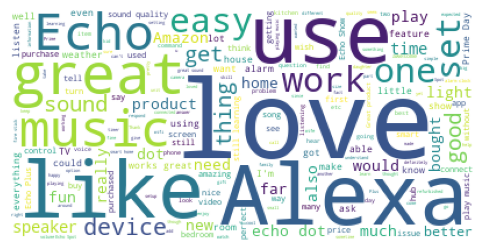

In [106]:
positive_joined_sentences = ''.join(x for x in positive['verified_reviews'])
plt.figure(figsize=(6,6))
wordcloud = WordCloud(stopwords = stopwords.words('english'),background_color='white').generate(positive_joined_sentences)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

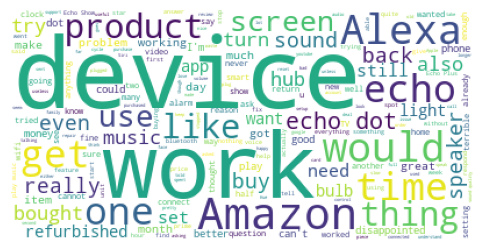

In [107]:
negative_joined_sentences = ''.join(x for x in negative['verified_reviews'])
plt.figure(figsize=(6,6))
wordcloud = WordCloud(stopwords = stopwords.words('english'),background_color='white').generate(negative_joined_sentences)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
#Intersting: so the negative feedback has to do with something about work/screen etc.

##### Data cleaning and Count Vectorization

In [108]:
#function that creates a pipeline to do all the work of removing punctuations and stopwords
def message_cleaning(message):
    message_removed = [x for x in message if x not in string.punctuation]
    message_removed_join = ''.join(message_removed)
    message_removed_join_clean = [x for x in message_removed_join.split() if x.lower() not in stopwords.words('english')]
    return message_removed_join_clean

In [109]:
amzn_df_clean  = amzn_df['verified_reviews'].apply(message_cleaning)
amzn_df_clean

0                                            [Love, Echo]
1                                                 [Loved]
2       [Sometimes, playing, game, answer, question, c...
3       [lot, fun, thing, 4, yr, old, learns, dinosaur...
4                                                 [Music]
                              ...                        
3145                    [Perfect, kids, adults, everyone]
3146    [Listening, music, searching, locations, check...
3147    [love, things, running, entire, home, TV, ligh...
3148    [complaint, sound, quality, isnt, great, mostl...
3149                                               [Good]
Name: verified_reviews, Length: 3150, dtype: object

In [110]:
#Or all at once and perform Vectorization like in the tutorial 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer=message_cleaning,dtype=np.uint8)
X = vectorizer.fit_transform(amzn_df['verified_reviews'])

In [111]:
print(vectorizer.get_feature_names_out())

['072318' '1' '10' ... '😬' '😳' '🤓']


In [112]:
print(X.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [113]:
X= pd.DataFrame(X.toarray())
X

,0,1,2,3,4,5,6,7,8,9,...,5201,5202,5203,5204,5205,5206,5207,5208,5209,5210
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3146,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3147,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3148,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [114]:
y = amzn_df['feedback']
y

0       1
1       1
2       1
3       1
4       1
       ..
3145    1
3146    1
3147    1
3148    1
3149    1
Name: feedback, Length: 3150, dtype: int64

##### Train models
***

In [117]:
#having created x, y data we can split them and start the training 
#models to test and use : Naive Bayes, Logistic regression, XGboost
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [123]:
#create a function to fit and predict the data
def fit_pred(model):
    model.fit(X_train,y_train)
    y_predict = model.predict(X_test)
    cm = confusion_matrix(y_test,y_predict)
    sns.heatmap(cm,annot = True).set(title=str(model))
    print(classification_report(y_test , y_predict))
    plt.show()
    return y_predict

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
!pip install xgboost
import xgboost as xgb

In [129]:
from sklearn.ensemble import GradientBoostingClassifier

In [131]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

              precision    recall  f1-score   support

           0       0.62      0.42      0.50        50
           1       0.95      0.98      0.96       580

    accuracy                           0.93       630
   macro avg       0.78      0.70      0.73       630
weighted avg       0.92      0.93      0.93       630



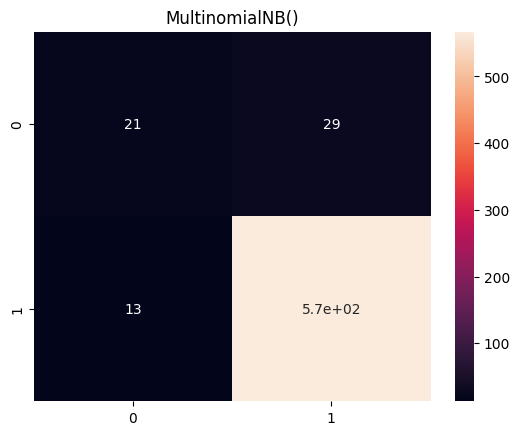

              precision    recall  f1-score   support

           0       0.82      0.36      0.50        50
           1       0.95      0.99      0.97       580

    accuracy                           0.94       630
   macro avg       0.88      0.68      0.73       630
weighted avg       0.94      0.94      0.93       630



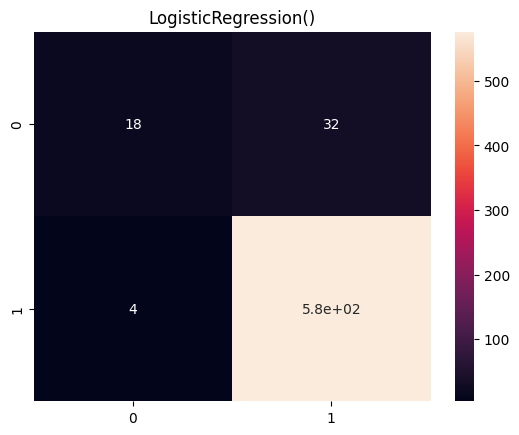

[14:24:04] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.92      1.00      0.96       580

    accuracy                           0.92       630
   macro avg       0.46      0.50      0.48       630
weighted avg       0.85      0.92      0.88       630



c:\Users\FSU_EYDAP\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\FSU_EYDAP\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\FSU_EYDAP\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

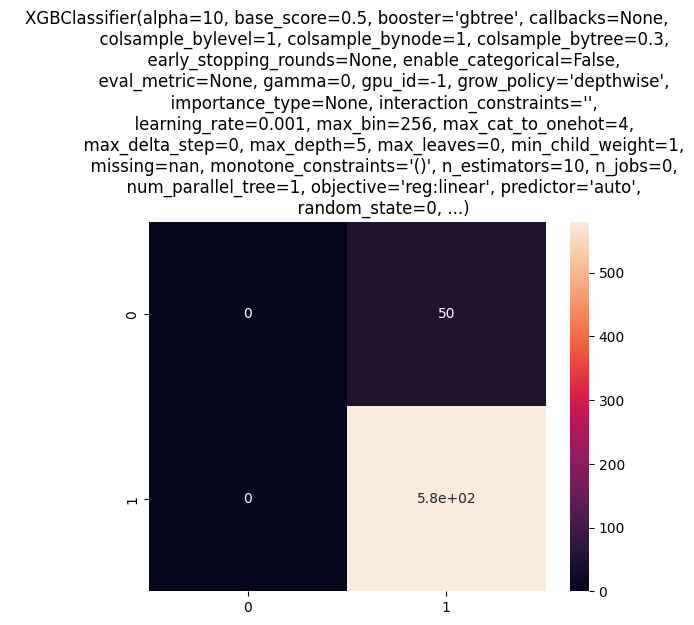

              precision    recall  f1-score   support

           0       0.65      0.22      0.33        50
           1       0.94      0.99      0.96       580

    accuracy                           0.93       630
   macro avg       0.79      0.60      0.65       630
weighted avg       0.91      0.93      0.91       630



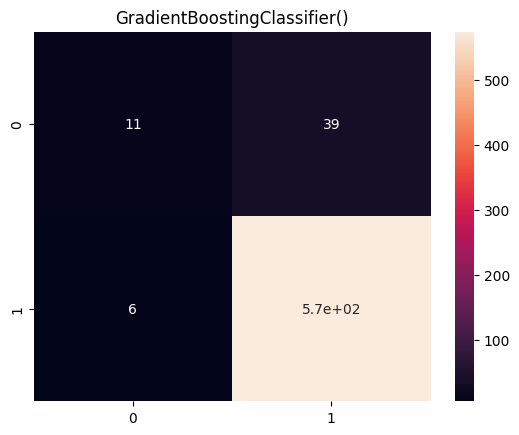

In [130]:

NB_classifier = MultinomialNB()
NB_classifier_pred = fit_pred(NB_classifier)
Log_Regression_classifier = LogisticRegression()
Log_Regression_classifier_pred = fit_pred(Log_Regression_classifier)

xg_reg = xgb.XGBClassifier(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.001,
                max_depth = 5, alpha = 10, n_estimators = 10)
xg_reg_clean = fit_pred(xg_reg)
gb = GradientBoostingClassifier()
gb_clean = fit_pred(gb)